In [3]:
import matplotlib.pyplot as plt
import os
import numpy as np

In [32]:
data_path = 'EEG_Data'

data = [[] for i in range(5)]

for i, dir in enumerate(os.listdir(data_path)):
    folder_path = os.path.join(data_path, dir)
    dirs = os.listdir(folder_path)
    
    for file in dirs:
        file_path = os.path.join(folder_path, file)
        spectrogram = np.load(file_path)
        data[i].append(spectrogram)

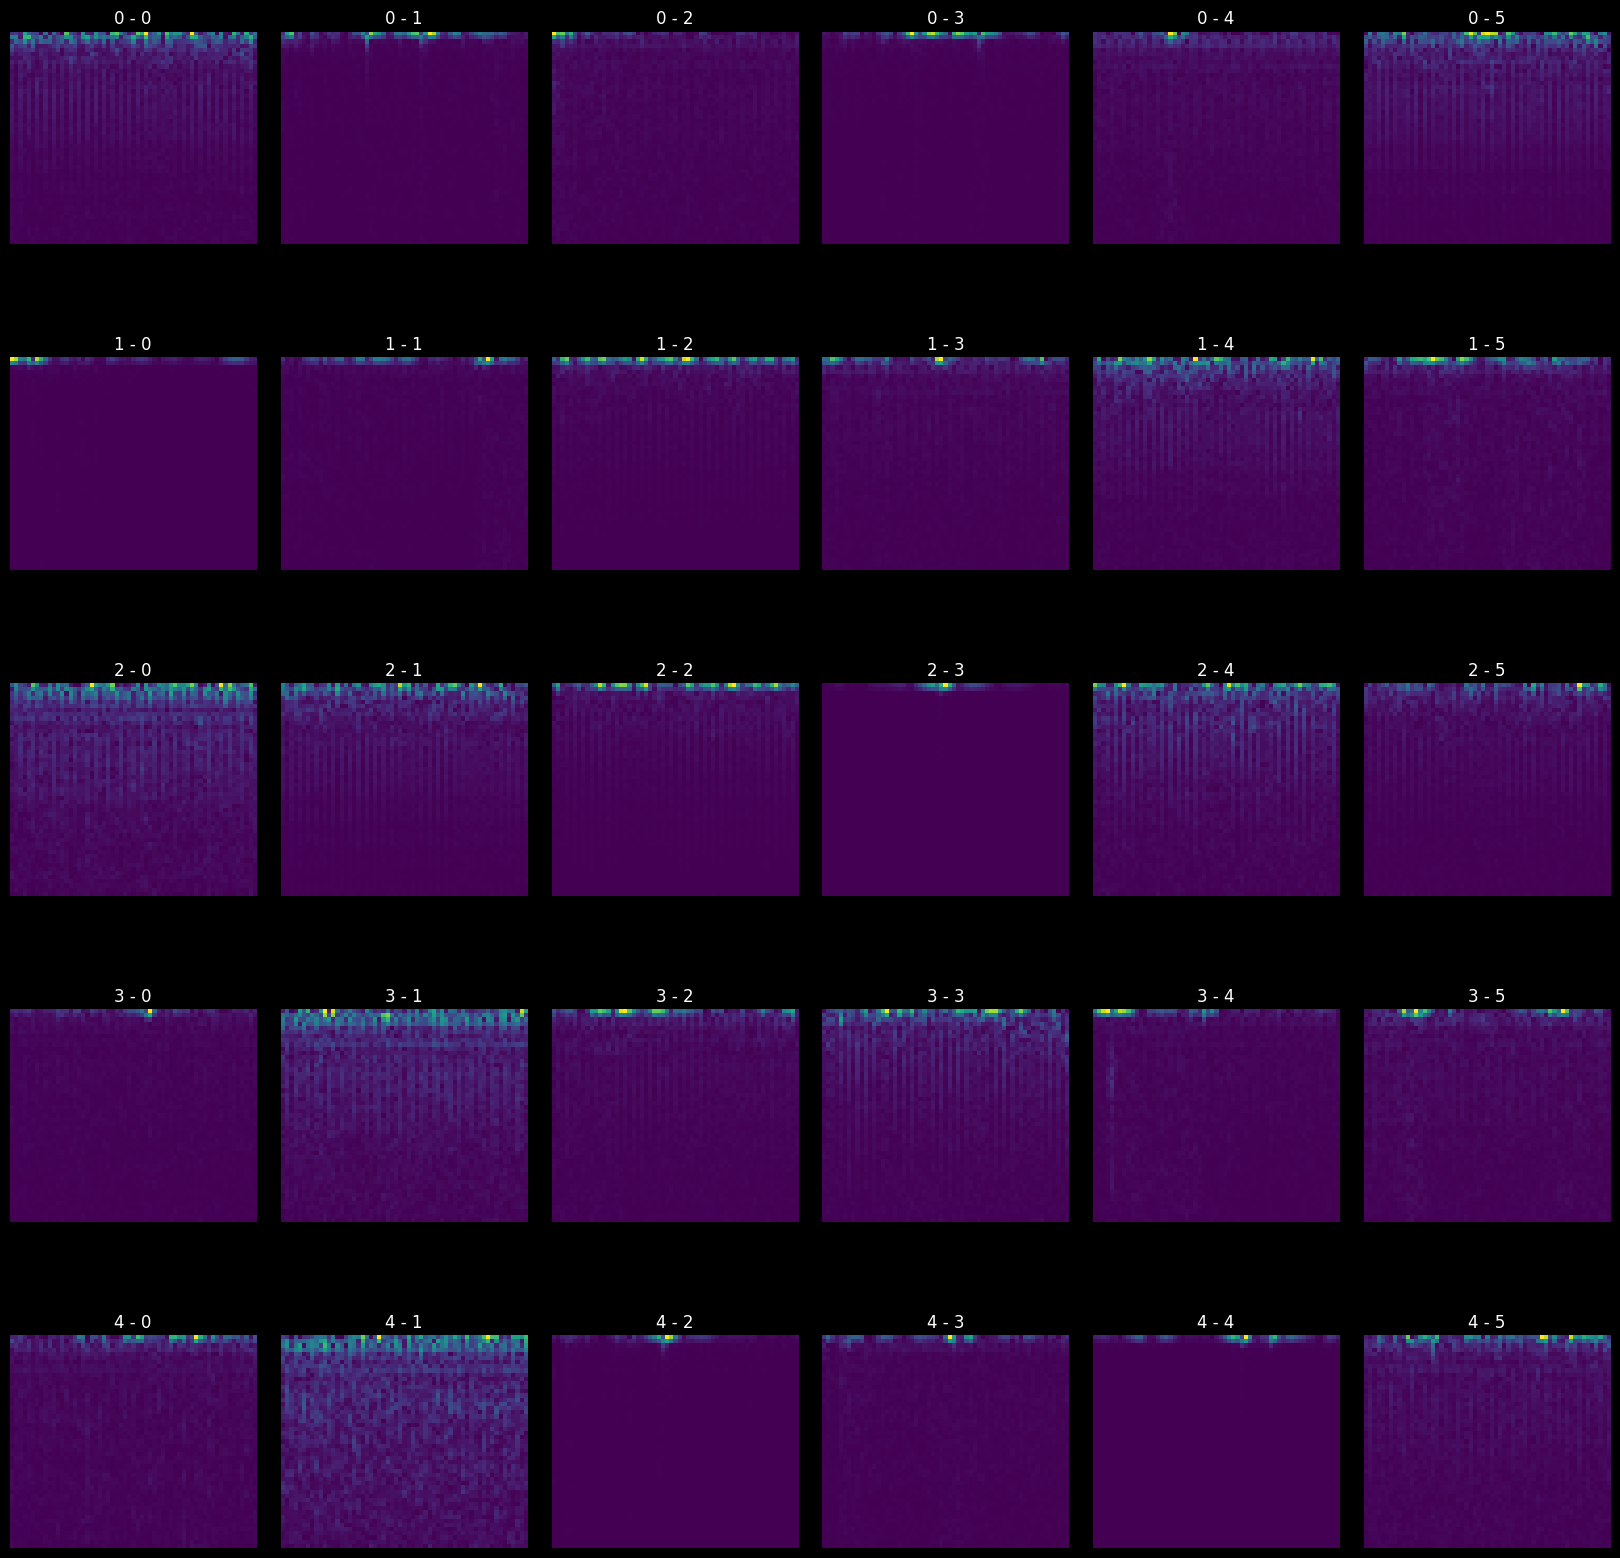

In [35]:
columns = 6

fig, axes = plt.subplots(5, columns, figsize=(20, 20))

for i in range(5):
    for j in range(columns):
        ax = axes[i, j]
        ax.imshow(data[i][j], interpolation='nearest')
        ax.axis('off')
        ax.set_title(f'{i} - {j}')  

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.1, hspace=0.1)

plt.show()

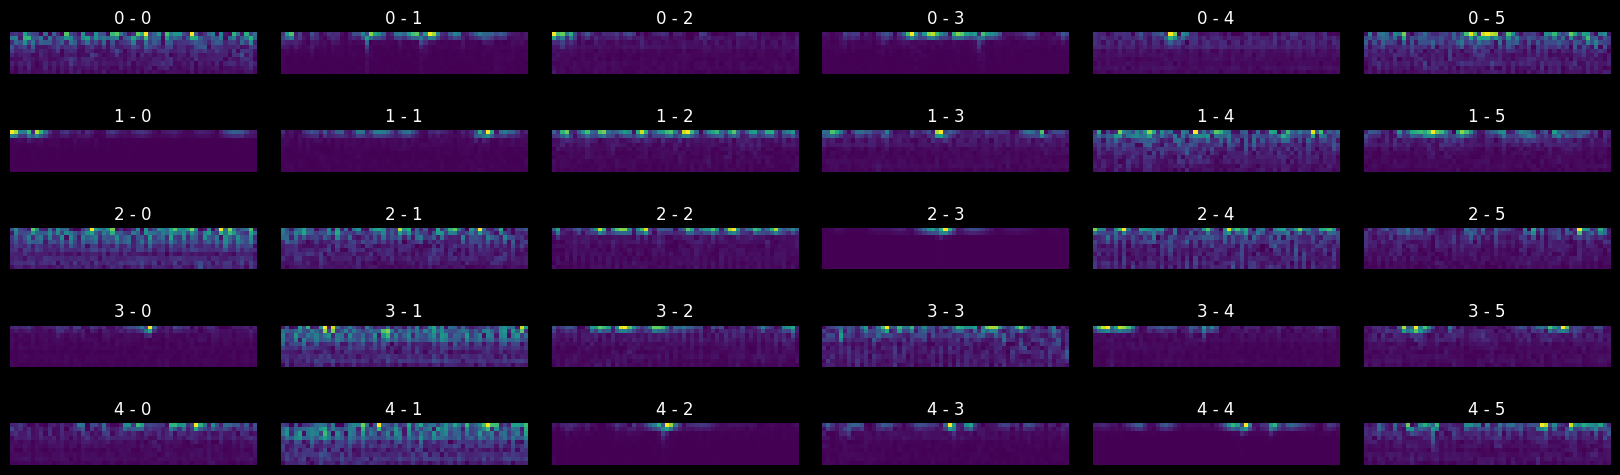

In [45]:
columns = 6

fig, axes = plt.subplots(5, columns, figsize=(20, 6))

for i in range(5):
    for j in range(columns):
        ax = axes[i, j]
        ax.imshow(data[i][j][:10, :], interpolation='nearest')
        ax.axis('off')
        ax.set_title(f'{i} - {j}')  

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.1, hspace=0.1)

plt.show()

In [47]:
print(data[0][0])

[[[2.39291960e-06]
  [2.95876372e-06]
  [1.73152924e-06]
  ...
  [1.13278249e-05]
  [3.44827929e-06]
  [6.62901109e-06]]

 [[7.14166373e-06]
  [7.52509948e-06]
  [1.24940841e-06]
  ...
  [7.60697177e-06]
  [1.14708530e-05]
  [5.74254469e-06]]

 [[2.21119028e-06]
  [5.94065952e-06]
  [4.40402931e-06]
  ...
  [3.40979912e-06]
  [8.75574838e-06]
  [1.87342256e-06]]

 ...

 [[2.80327908e-07]
  [1.58332101e-07]
  [1.24798507e-07]
  ...
  [2.72863714e-07]
  [1.58232986e-07]
  [3.57863613e-08]]

 [[2.40712227e-07]
  [1.33468023e-07]
  [1.37124951e-07]
  ...
  [1.89834042e-07]
  [1.12209757e-07]
  [1.12739671e-07]]

 [[7.87041923e-08]
  [2.03010218e-07]
  [7.80406305e-08]
  ...
  [2.00572794e-08]
  [5.65849004e-08]
  [1.11799149e-07]]]


In [87]:
X = []
Y = []

for dir in os.listdir(data_path):
    folder_path = os.path.join(data_path, dir)
    dirs = os.listdir(folder_path)
    
    
    for i, file in enumerate(dirs):
        if i == 10:
            break
        file_path = os.path.join(folder_path, file)
        spectrogram = np.load(file_path)
        X.append(spectrogram)
        Y.append(int(dir))

X = np.array(X)
X_normalized = np.array([((x - x.mean()) / (x.std() + 1e-8)) for x in X])
Y = np.array(Y)

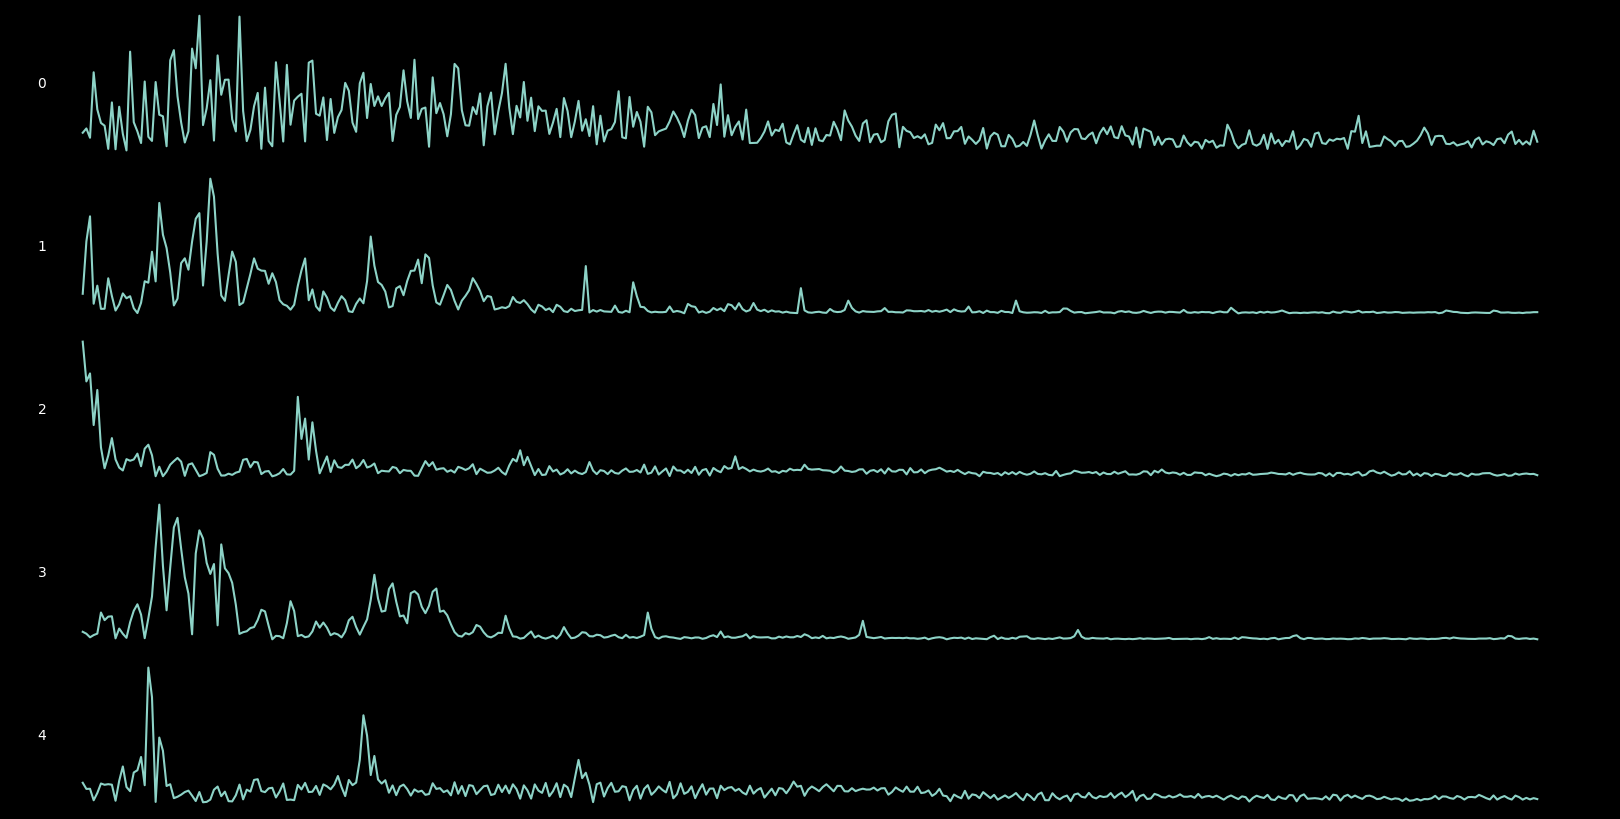

In [91]:
columns = 1

fig, axes = plt.subplots(5, columns, figsize=(20, 10))

for i in range(5):
    for j in range(columns):
        ax = axes[i]
        ax.plot(X_normalized[i].reshape(-1, 1)[:400])
        ax.axis('off')
        ax.text(0.02, 0.5, f'{i}', transform=ax.transAxes, ha='center', va='center')
        

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.1, hspace=0.1)

plt.show()